# Importing all Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix #Importing confusion matrix package
from sklearn.metrics import accuracy_score #Importing accuracy score package

# Insert Data file

In [2]:
col_names = ["age", "sex", "cp", "restbp", "chol", "fbs", "restecg",
             "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
HeartData = pd.read_csv('F:\\PROGRAMMING\\Python\\Project\\Heart Disease\\cleveland.csv',sep=',',names=col_names)
HeartData.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


# Checking missing values

In [3]:
HeartData.isnull().sum()

age        0
sex        0
cp         0
restbp     0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         4
thal       2
target     0
dtype: int64

# Removing missing values

In [4]:
imputer=Imputer(missing_values='NaN',strategy='mean',axis=0)
imputer=imputer.fit(HeartData.iloc[:,11:13])
HeartData.iloc[:,11:13]=imputer.transform(HeartData.iloc[:,11:13])

C:\Users\mayur\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [5]:
HeartData.isnull().sum()

age        0
sex        0
cp         0
restbp     0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         0
thal       0
target     0
dtype: int64

# Checking Outliers

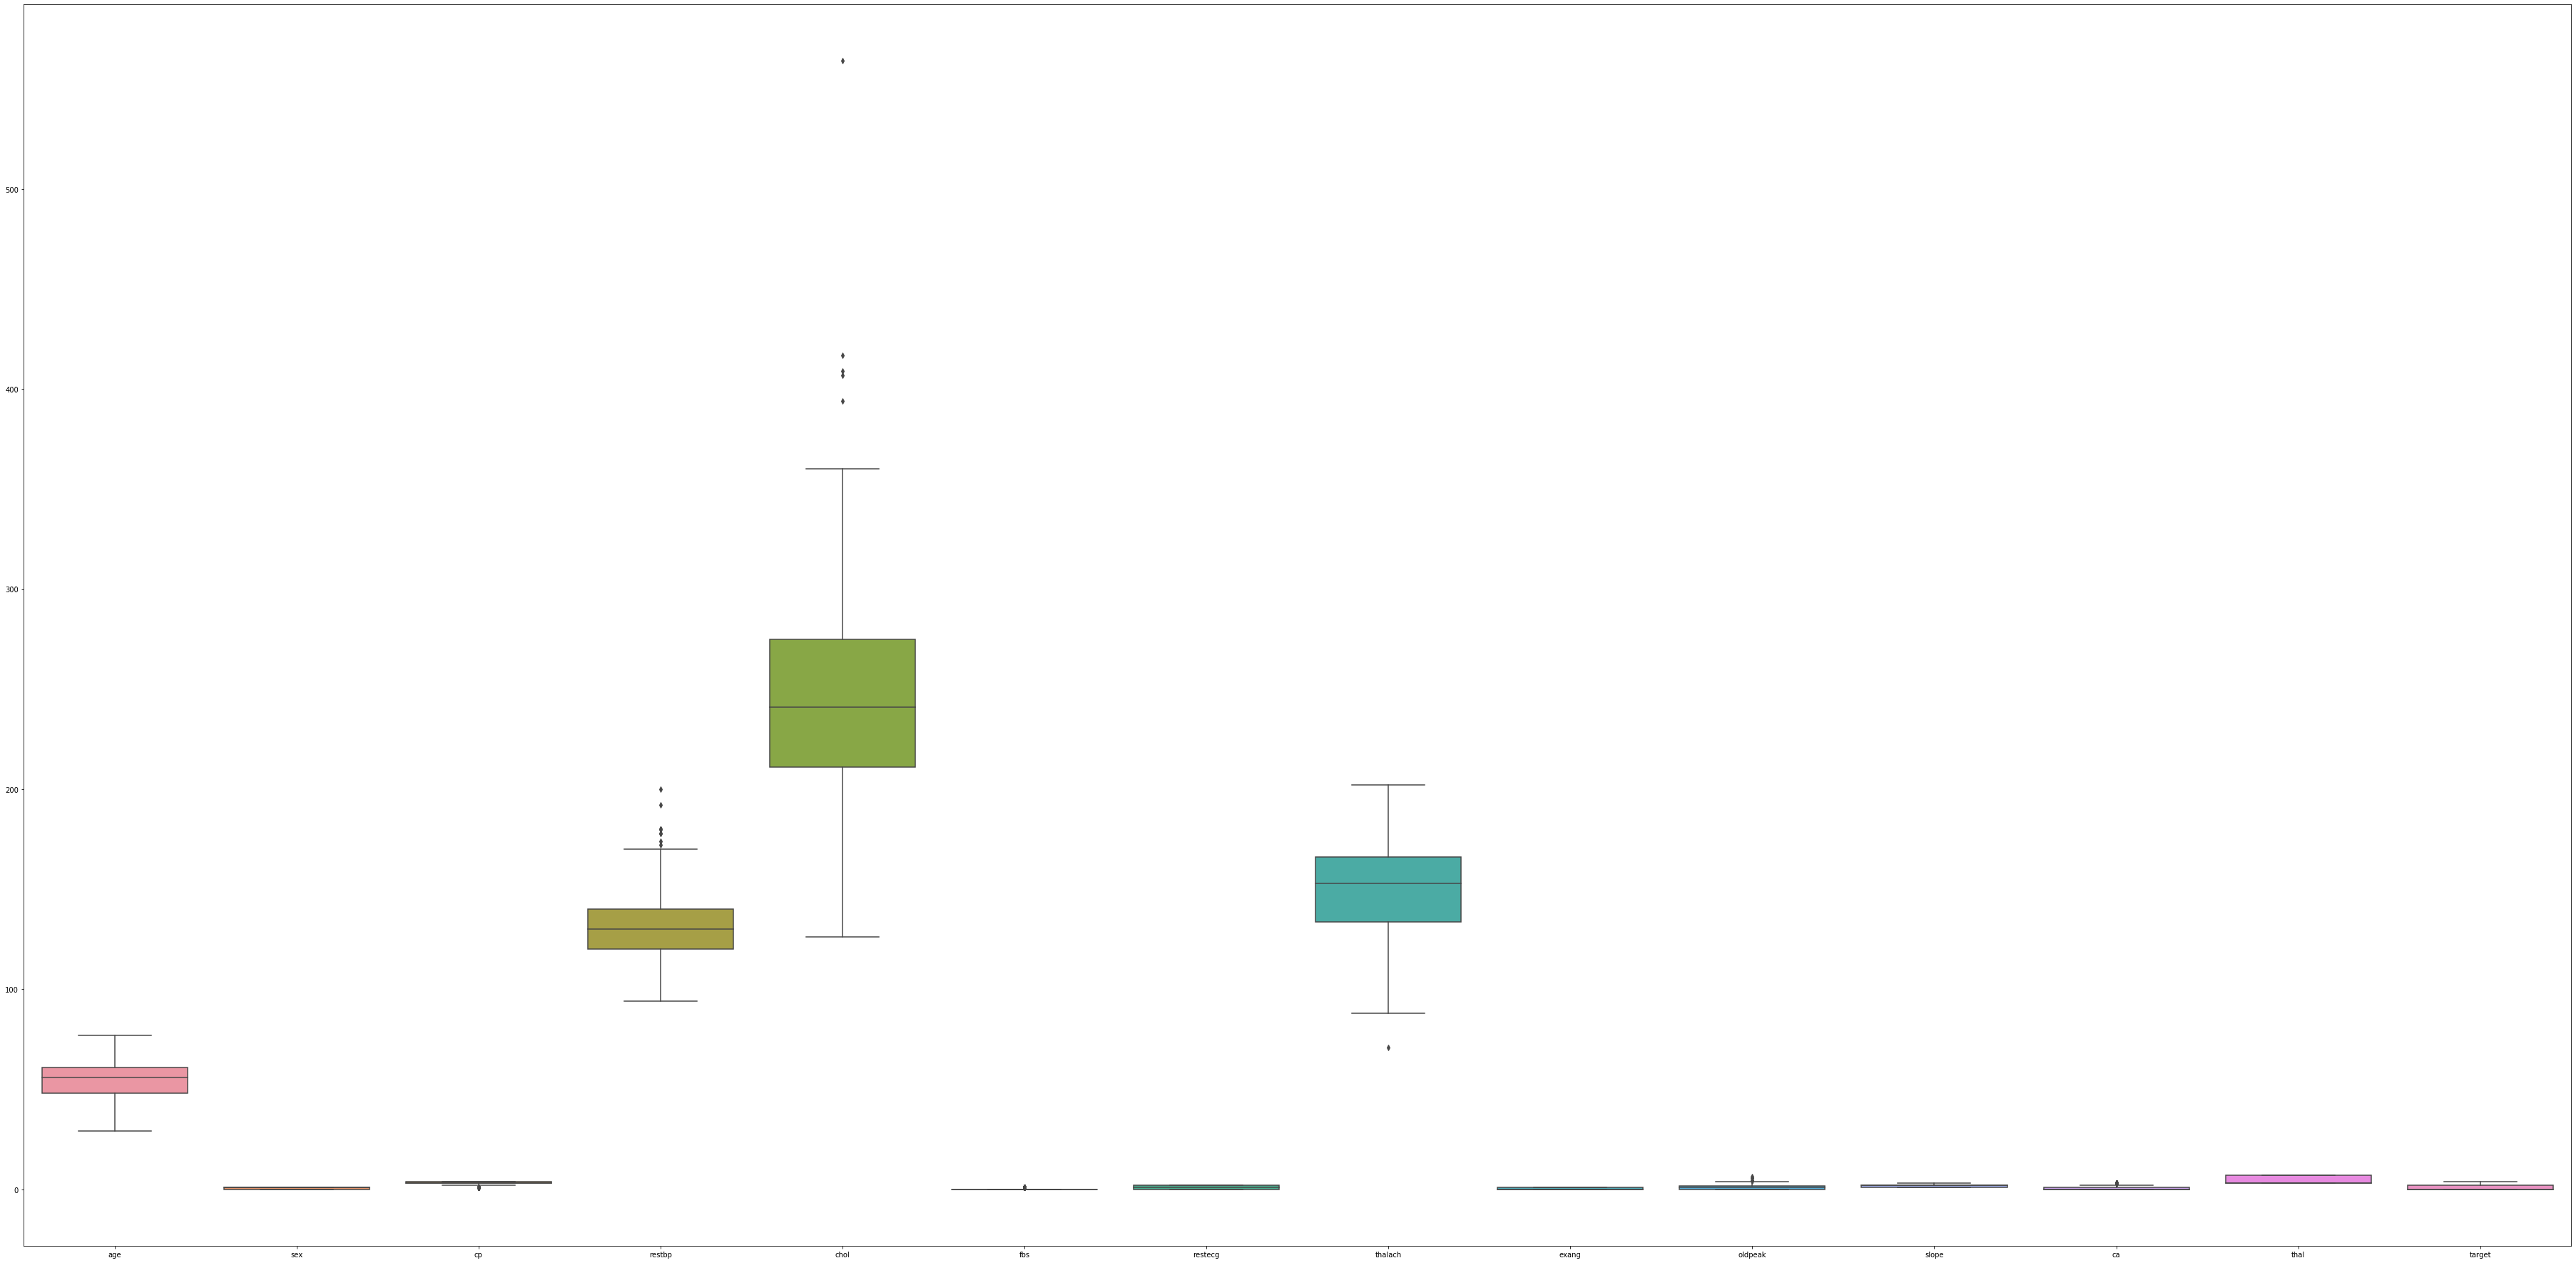

In [6]:
fig, ax = plt.subplots()
fig.set_size_inches(64,32)
sns.boxplot(data=HeartData)

# Removing Outliers

In [7]:
def outlier_detect(df):
    for i in df.describe().columns:
        Q1=df.describe().at['25%',i]
        Q3=df.describe().at['75%',i]
        IQR=Q3-Q1
        LTV=Q1-1.5*IQR
        UTV=Q3+1.5*IQR
        df[i]=df[i].mask(df[i]<LTV,LTV)
        df[i]=df[i].mask(df[i]>UTV,UTV)
    return df
HeartData = outlier_detect(HeartData) # Remove outliers

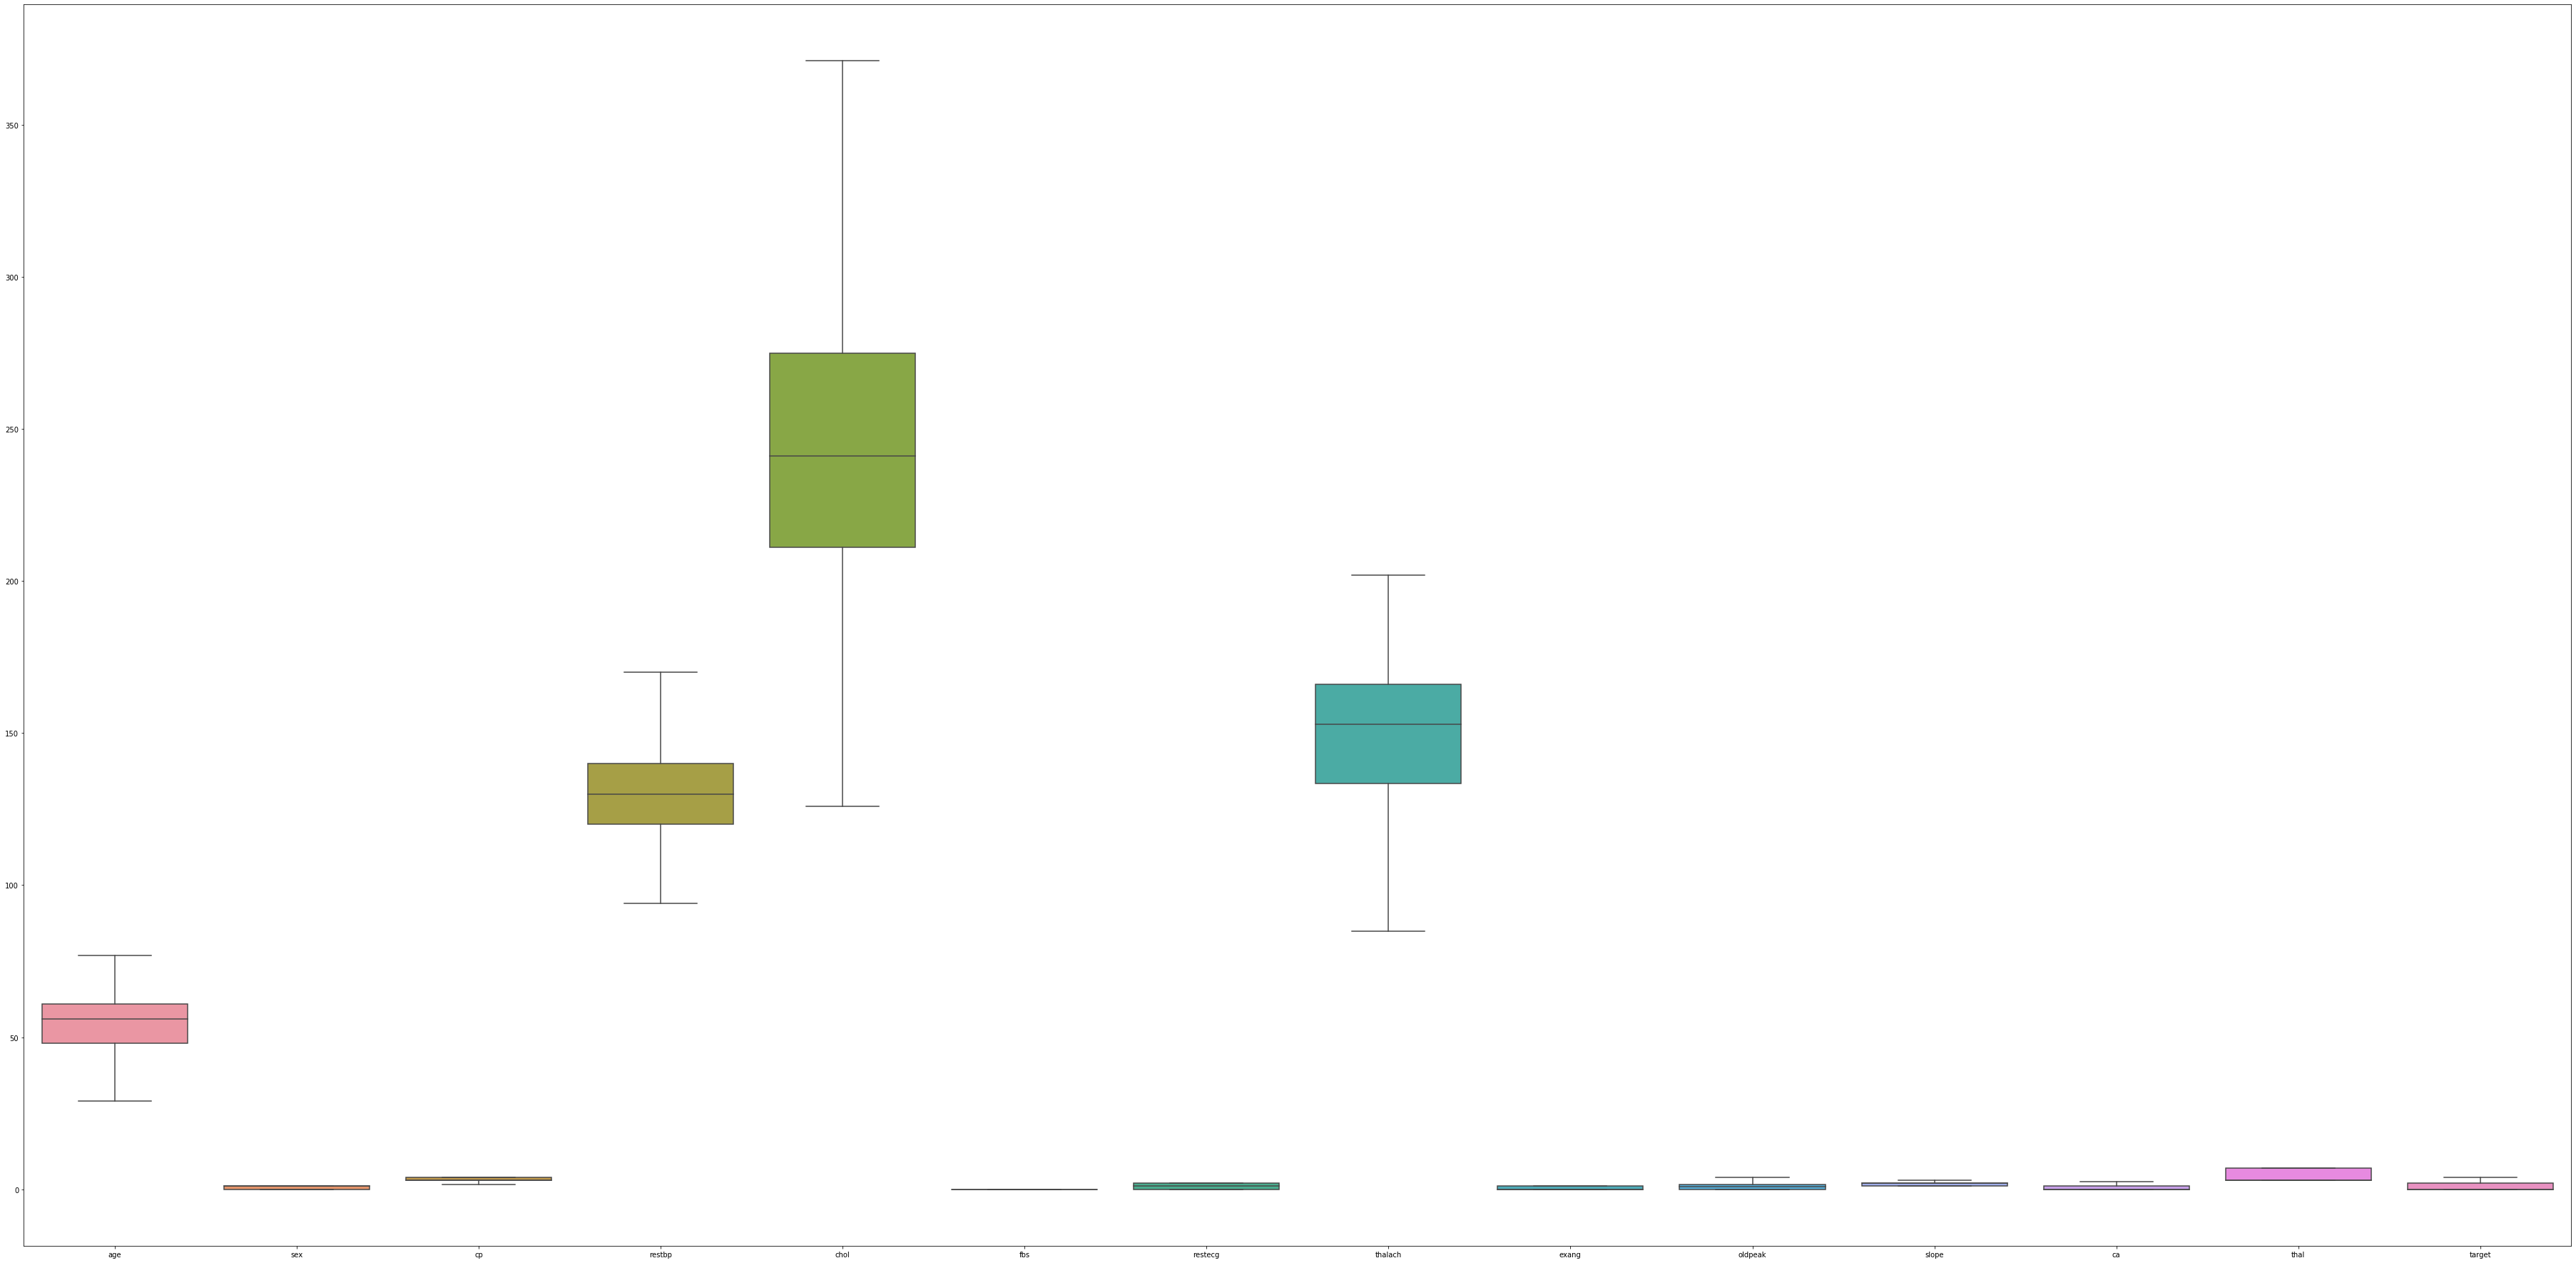

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(64,32)
sns.boxplot(data=HeartData)

# Description of Data

In [9]:
HeartData.dtypes

age          int64
sex          int64
cp         float64
restbp       int64
chol         int64
fbs          int64
restecg      int64
thalach    float64
exang        int64
oldpeak    float64
slope        int64
ca         float64
thal       float64
target       int64
dtype: object

In [10]:
HeartData.describe()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.0,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.196370,131.346535,245.584158,0.0,0.990099,149.652640,0.326733,1.024422,1.600660,0.639238,4.734219,0.937294
std,9.038662,0.467299,0.880371,16.648749,47.558803,0.0,0.994971,22.731735,0.469794,1.110127,0.616226,0.853498,1.933272,1.228536
min,29.000000,0.000000,1.500000,94.000000,126.000000,0.0,0.000000,84.750000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.0,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.0,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.0,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,170.000000,371.000000,0.0,2.000000,202.000000,1.000000,4.000000,3.000000,2.500000,7.000000,4.000000


# Creating X data and Y data

In [11]:
X = HeartData.iloc[:, :-1]
y = HeartData.iloc[:, -1:]

In [12]:
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1.5,145,233,0,2,150.0,0,2.3,3,0.0,6.0
1,67,1,4.0,160,286,0,2,108.0,1,1.5,2,2.5,3.0
2,67,1,4.0,120,229,0,2,129.0,1,2.6,2,2.0,7.0
3,37,1,3.0,130,250,0,0,187.0,0,3.5,3,0.0,3.0
4,41,0,2.0,130,204,0,2,172.0,0,1.4,1,0.0,3.0


In [13]:
y.head()

,target
0,0
1,2
2,1
3,0
4,0


# Spliting Train data and Test data

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

# K-Nearset Neighbors Algrothim

In [15]:
classifier_knn = KNeighborsClassifier(n_neighbors=5)
classifier_knn.fit(X_train, y_train)

C:\Users\mayur\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [16]:
y_pred_knn = classifier_knn.predict(X_test) #Predicting data
y_pred_knn

array([0, 0, 0, 1, 0, 0, 2, 0, 2, 0, 1, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 4, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

In [17]:
cm_knn = confusion_matrix(y_test, y_pred_knn) #Confusion Matrix
cm_knn

array([[32,  2,  0,  1,  0],
       [ 9,  1,  2,  0,  1],
       [ 3,  3,  0,  0,  0],
       [ 3,  0,  1,  0,  0],
       [ 2,  1,  0,  0,  0]], dtype=int64)

In [18]:
Accuracy_Score_knn = accuracy_score(y_test, y_pred_knn) #Calculating Accuracy Score
Accuracy_Score_knn

0.5409836065573771

# Naive Bayes Algrothim

In [19]:
classifier_NB = GaussianNB() #Building Model
classifier_NB.fit(X_train,y_train) #Fitting Model

C:\Users\mayur\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [20]:
y_pred_NB = classifier_NB.predict(X_test) #Predicting data
y_pred_NB

array([0, 0, 1, 1, 0, 1, 3, 1, 3, 1, 1, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 1, 0, 0, 3, 2, 3, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 3, 0, 0, 2, 0], dtype=int64)

In [21]:
cm_NB = confusion_matrix(y_test, y_pred_NB) #Confusion Matrix
cm_NB

array([[28,  5,  2,  0,  0],
       [ 7,  3,  0,  3,  0],
       [ 2,  3,  1,  0,  0],
       [ 0,  1,  2,  1,  0],
       [ 0,  1,  1,  1,  0]], dtype=int64)

In [22]:
Accuracy_Score_NB = accuracy_score(y_test, y_pred_NB) #Calculating Accuracy Score
Accuracy_Score_NB

0.5409836065573771

# Support Vector Machine Algrothim

In [23]:
classifier_svm_linear = SVC(kernel = 'linear', random_state = 0) #Building Model
classifier_svm_linear.fit(X_train, y_train) #Fitting Model

C:\Users\mayur\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [24]:
y_pred_svm_linear = classifier_svm_linear.predict(X_test) #Predicting data
y_pred_svm_linear

array([0, 0, 1, 1, 0, 0, 2, 1, 3, 1, 1, 0, 2, 1, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 3, 1, 3, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0], dtype=int64)

In [25]:
cm_svm_linear = confusion_matrix(y_test, y_pred_svm_linear) #Confusion Matrix
cm_svm_linear

array([[31,  2,  2,  0,  0],
       [ 7,  3,  1,  2,  0],
       [ 3,  2,  1,  0,  0],
       [ 0,  2,  0,  2,  0],
       [ 0,  2,  0,  1,  0]], dtype=int64)

In [26]:
Accuracy_Score_svm_linear = accuracy_score(y_test, y_pred_svm_linear) #Calculating Accuracy Score
Accuracy_Score_svm_linear

0.6065573770491803

# Support Vector Machine Gaussion Algrothim

In [27]:
classifier_svm_rbf = SVC(kernel = 'rbf', random_state = 0) #Building Model using 'rbf' = Gaussion
classifier_svm_rbf.fit(X_train, y_train) #Fitting Model

C:\Users\mayur\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mayur\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [28]:
y_pred_svm_rbf = classifier_svm_rbf.predict(X_test) #Predicting data
y_pred_svm_rbf

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [29]:
cm_svm_rbf = confusion_matrix(y_test, y_pred_svm_linear) #Confusion Matrix
cm_svm_rbf

array([[31,  2,  2,  0,  0],
       [ 7,  3,  1,  2,  0],
       [ 3,  2,  1,  0,  0],
       [ 0,  2,  0,  2,  0],
       [ 0,  2,  0,  1,  0]], dtype=int64)

In [30]:
Accuracy_Score_svm_rbf = accuracy_score(y_test, y_pred_svm_rbf) #Calculating Accuracy Score
Accuracy_Score_svm_rbf

0.5737704918032787

# Support Vector Machine Polynomial Algrothim

In [ ]:
classifier_svm_poly = SVC(kernel = 'poly', random_state = 0)#Building Model using 'poly' = Polynomial
classifier_svm_poly.fit(X_train, y_train) #Fiiting Model

C:\Users\mayur\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mayur\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
y_pred_svm_poly = classifier_svm_poly.predict(X_test) #Predicting data
y_pred_svm_poly

In [ ]:
cm_svm_poly = confusion_matrix(y_test, y_pred_svm_poly) #Confusion Matrix
cm_svm_poly

In [ ]:
Accuracy_Score_svm_poly = accuracy_score(y_test, y_pred_svm_poly) #Calculating Accuracy Score
Accuracy_Score_svm_poly

# Support Vector Machine Sigmoid Algrothim 

In [ ]:
classifier_svm_sigmoid = SVC(kernel = 'sigmoid', random_state = 0)#Building Model using 'sigmoid' = Sigmoid
classifier_svm_sigmoid.fit(X_train, y_train) #Fitting Model

In [ ]:
y_pred_svm_sigmoid = classifier_svm_sigmoid.predict(X_test) #Predicting data
y_pred_svm_sigmoid

In [ ]:
cm_svm_sigmoid = confusion_matrix(y_test, y_pred_svm_sigmoid) #Confusion Matrix
cm_svm_sigmoid

In [ ]:
Accuracy_Score_svm_sigmoid = accuracy_score(y_test, y_pred_svm_sigmoid) #Calculating Accuracy Score
Accuracy_Score_svm_sigmoid

# Decision Tree Algorithm

In [ ]:
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0) #Building Model
classifier_dt.fit(X_train, y_train) #Fitting Model

In [ ]:
y_pred_dt = classifier_dt.predict(X_test)
y_pred_dt

In [ ]:
cm_dt = confusion_matrix(y_test, y_pred_dt) #Confussion Matrix
cm_dt

In [ ]:
Accuracy_Score_dt = accuracy_score(y_test, y_pred_dt) #Calculating Accuracy Score
Accuracy_Score_dt

# Random Forest Algrothim

In [ ]:
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0) #Building Model
classifier_rf.fit(X_train, y_train) #Fitting Model

In [ ]:
y_pred_rf = classifier_rf.predict(X_test)
y_pred_rf

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf

In [ ]:
Accuracy_Score_rf = accuracy_score(y_test, y_pred_rf)
Accuracy_Score_rf

# XgBoost Algrothim

In [ ]:
classifier_xg = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05)
classifier_xg.fit(X_train, y_train)

In [ ]:
y_pred_xg = classifier_xg.predict(X_test)
y_pred_xg

In [ ]:
cm_xg = confusion_matrix(y_test, y_pred_xg)
cm_xg

In [ ]:
Accuracy_Score_xg = accuracy_score(y_test, y_pred_xg)
Accuracy_Score_xg

In [ ]:
print("K-Nearest Neighbors =",Accuracy_Score_knn)
print("Naive Bayes =",Accuracy_Score_NB)
print("Support Vector Machine Linear =",Accuracy_Score_svm_linear)
print("Support Vector Machine Gaussion =",Accuracy_Score_svm_rbf)
print("Support Vector Machine Polynomial =",Accuracy_Score_svm_poly)
print("Support Vector Machine Sigmoid =",Accuracy_Score_svm_sigmoid)
print("Decision Tree =",Accuracy_Score_dt)
print("Random Forest =",Accuracy_Score_rf)
print("XgBoost =",Accuracy_Score_xg)

# Data Visualization

In [ ]:
sns.lmplot(x='cp', y='target', data=HeartData)
sns.lmplot(x='restbp', y='target', data=HeartData)
sns.lmplot(x='chol', y='target', data=HeartData)
sns.lmplot(x='fbs', y='target', data=HeartData)
sns.lmplot(x='restecg', y='target', data=HeartData)
sns.lmplot(x='thalach', y='target', data=HeartData)
sns.lmplot(x='exang', y='target', data=HeartData)
sns.lmplot(x='oldpeak', y='target', data=HeartData)
sns.lmplot(x='slope', y='target', data=HeartData)
sns.lmplot(x='ca', y='target', data=HeartData)
sns.lmplot(x='thal', y='target', data=HeartData)

In [ ]:
sns.pairplot(HeartData, hue='target', size=2.5);